In [1]:
import os
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [2]:
directory = '/data/project/general/aerosolretriev/aerosol_results_21_08_2022/autoencoder_model'

In [3]:
directory

'/data/project/general/aerosolretriev/aerosol_results_21_08_2022/autoencoder_model'

# Config

In [4]:
plot_dir = directory + '/version1/plots'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

In [5]:
result_dir = directory+'/version1'

In [6]:
model_dir = directory+'/version1/models'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)



# Load data

In [7]:
df = pd.read_csv(f'{result_dir}/results.csv', index_col=0)

In [8]:
config_columns = [col for col in df.columns if col.startswith('config/') if col.replace('config/', '') != 'datafile']
config_column_labels = {col: col.replace('config/', '') for col in config_columns if col != 'datafile'}

In [9]:
df.columns

Index(['MAE_train_dvar1', 'MAE_train_dvar2', 'MAE_train_qoi1', 'MAE_val_dvar1',
       'MAE_val_dvar2', 'MAE_val_qoi1', 'MAPE_train_dvar1', 'MAPE_train_dvar2',
       'MAPE_train_qoi1', 'MAPE_val_dvar1', 'MAPE_val_dvar2', 'MAPE_val_qoi1',
       'MSE_train_dvar1', 'MSE_train_dvar2', 'MSE_train_qoi1', 'MSE_val_dvar1',
       'MSE_val_dvar2', 'MSE_val_qoi1',
       'median_percentile_max_error_train_dvar1',
       'median_percentile_max_error_train_dvar2',
       'median_percentile_max_error_train_qoi1',
       'median_percentile_max_error_val_dvar1',
       'median_percentile_max_error_val_dvar2',
       'median_percentile_max_error_val_qoi1',
       '90_percentile_max_error_train_dvar1',
       '90_percentile_max_error_train_dvar2',
       '90_percentile_max_error_train_qoi1',
       '90_percentile_max_error_val_dvar1',
       '90_percentile_max_error_val_dvar2', '90_percentile_max_error_val_qoi1',
       'r2_train_dvar1', 'r2_train_dvar2', 'r2_train_qoi1', 'r2_val_dvar1',
       'r2_v

In [10]:
df['r2_train_dvar1'],df['r2_val_dvar1']

(0     0.998244
 1     0.996825
 2     0.993225
 3     0.998726
 4     0.998019
 5    -0.001097
 6    -0.000548
 7    -0.008264
 8    -0.001097
 9    -0.000548
 10   -0.009822
 11   -0.001097
 12    0.995380
 13   -0.008264
 14   -0.001097
 15    0.995866
 16    0.994092
 17   -0.001097
 18   -0.000243
 19   -0.000707
 20   -0.001097
 21   -0.000243
 22   -0.000707
 23   -0.001097
 24   -0.000548
 25   -0.009822
 26   -0.001097
 27   -0.000243
 28   -0.000707
 29   -0.001097
 30   -0.000548
 31   -0.006586
 32   -0.008264
 33   -0.000243
 34   -0.000707
 35   -0.001097
 36   -0.000548
 37   -0.010915
 38   -0.009822
 39   -0.000243
 40   -0.000707
 41   -0.001097
 42   -0.000346
 43   -0.000707
 44   -0.001097
 45   -0.000707
 46   -0.010915
 47   -0.001097
 Name: r2_train_dvar1, dtype: float64,
 0     0.998261
 1     0.996850
 2     0.993227
 3     0.998721
 4     0.998021
 5    -0.000901
 6    -0.000476
 7    -0.007558
 8    -0.000901
 9    -0.000476
 10   -0.009089
 11   -0.000901
 

# Plot

## Generalisation of adjusted $R^2$

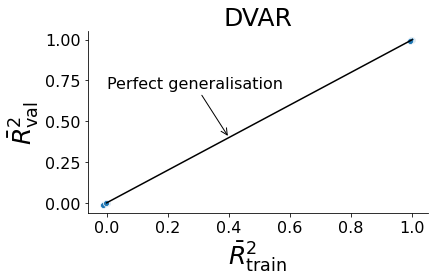

In [11]:
fig, ax = plt.subplots()

sns.scatterplot(data=df, x='r2_adj_train_dvar1', y='r2_adj_val_dvar1', ax=ax)
ax.plot([0., 1.], [0., 1.], color='black')
ax.annotate(xy=(0.4, 0.4),
            xytext=(0.0, 0.7),
            text='Perfect generalisation',
            fontsize=16,
            arrowprops={
                'arrowstyle': '->'
            })
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\bar{R}^2_\mathrm{train}$', fontsize=25)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=25)
ax.tick_params(labelsize=16)
ax.set_title('DVAR', fontsize = 25)
fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_generalisation.jpg')

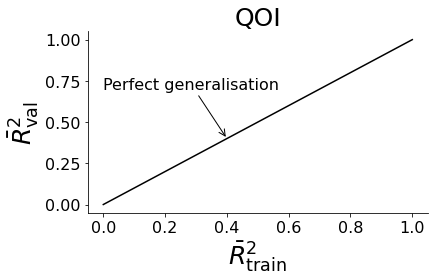

In [12]:
fig, ax = plt.subplots()

sns.scatterplot(data=df, x='r2_adj_train_qoi1', y='r2_val_qoi1', ax=ax)
ax.plot([0., 1.], [0., 1.], color='black')
ax.annotate(xy=(0.4, 0.4),
            xytext=(0.0, 0.7),
            text='Perfect generalisation',
            fontsize=16,
            arrowprops={
                'arrowstyle': '->'
            })
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\bar{R}^2_\mathrm{train}$', fontsize=25)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=25)
ax.tick_params(labelsize=16)
ax.set_title('QOI', fontsize = 25)
fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_generalisation.jpg')

## Relationship between $R^2$ and rel. error

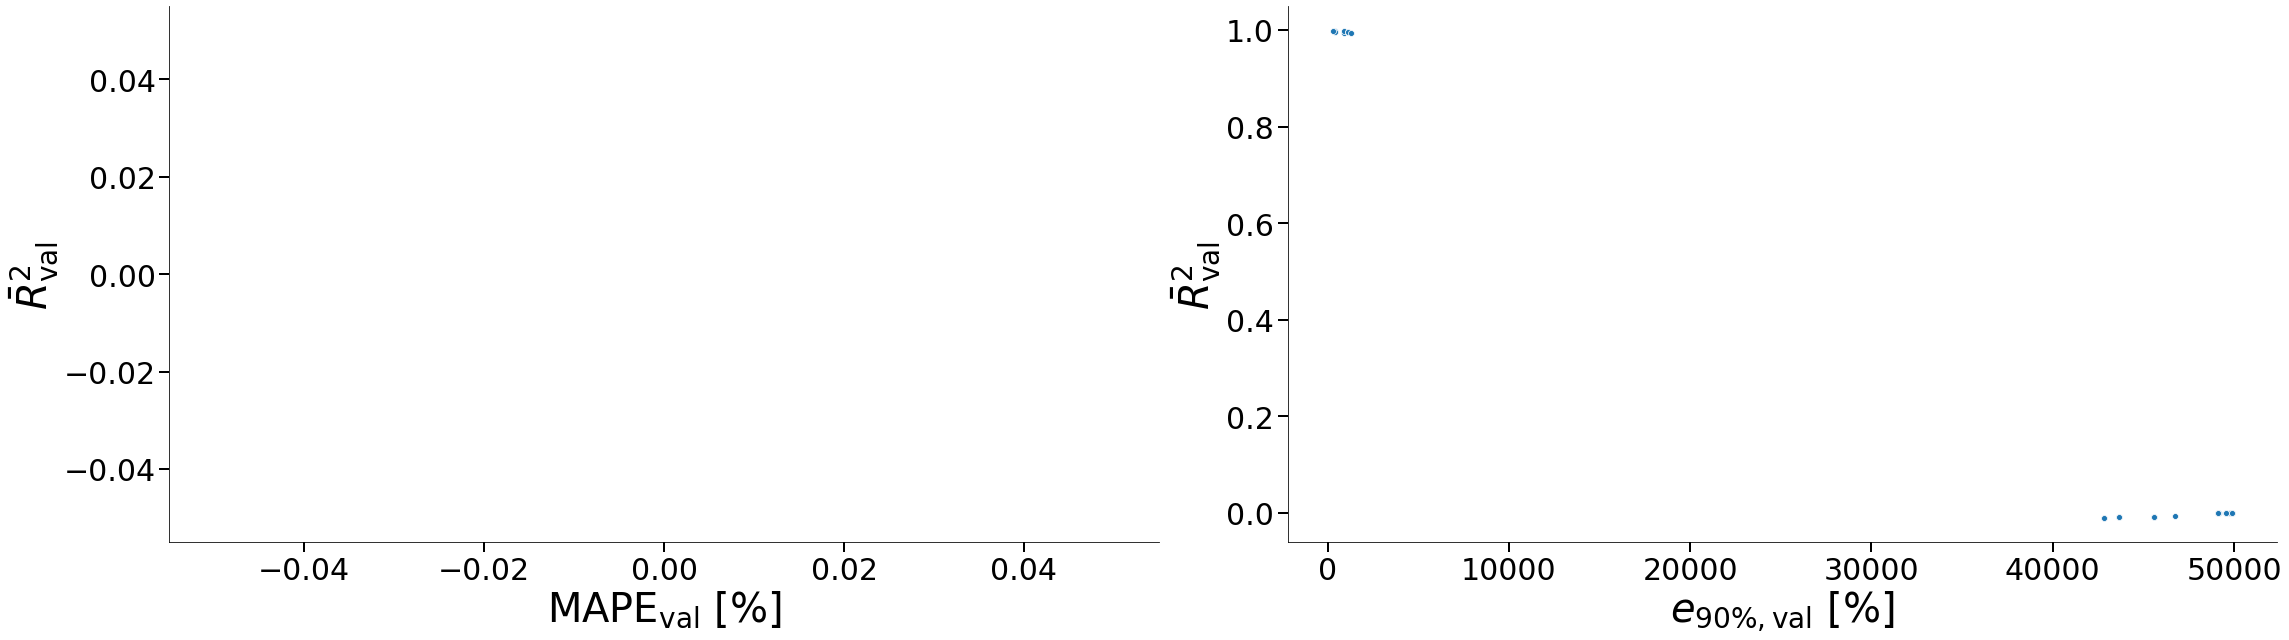

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(32, 9))

ax = axes[0]
sns.scatterplot(data=df, x='MAPE_val_dvar1', y='r2_adj_val_dvar1', ax=ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\mathrm{MAPE}_\mathrm{val}$ [%]', fontsize=40)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=40)

ax = axes[1]
sns.scatterplot(data=df, x='90_percentile_max_error_val_dvar1', y='r2_val_dvar1', ax=ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$e_\mathrm{90\%, val}$ [%]', fontsize=40)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=40)

for ax in axes:
    ax.tick_params(labelsize=30, width=2, length=10)

fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_vs_rel_errors.jpg')

## Dependence on the parameters

In [14]:
#y_lim = [0.995, 1.005]
y_lim = [0., 1.]

In [15]:
config_columns

['config/alpha',
 'config/batch_size',
 'config/epochs',
 'config/learning_rate',
 'config/n_decode_layers',
 'config/n_encode_layers']

In [16]:
to_plot = df[config_columns + ['r2_adj_val_dvar1']+['r2_adj_val_qoi1']].rename(columns=config_column_labels)

In [17]:
to_plot_ow =to_plot.copy()

In [18]:
to_plot_ow

alpha  batch_size  epochs  learning_rate  n_decode_layers  \
0       1          64     100          0.001                2   
1       1          64     100          0.005                2   
2       1          64     100          0.010                2   
3       1          64     100          0.001                5   
4       1          64     100          0.005                5   
5       1          64     100          0.010                5   
6       1          64     100          0.001               20   
7       1          64     100          0.005               20   
8       1          64     100          0.010               20   
9       1          64     100          0.001              100   
10      1          64     100          0.005              100   
11      1          64     100          0.010              100   
12      1          64     100          0.001                2   
13      1          64     100          0.005                2   
14      1          64     100          0.010                2   
15      1          64     100          0.001                5   
16      1          64     100          0.005                5   
17      1          64     100          0.010                5   
18      1          64     100          0.001               20   
19      1          64     100          0.005               20   
20      1          64     100          0.010               20   
21      1          64     100          0.001              100   
22      1          64     100          0.005              100   
23      1          64     100          0.010              100   
24      1          64     100          0.001                2   
25      1          64     100          0.005                2   
26      1          64     100          0.010                2   
27      1          64     100          0.001                5   
28      1          64     100          0.005                5   
29      1          64     100          0.010                5   
30      1          64     100          0.001               20   
31      1          64     100          0.005               20   
32      1          64     100          0.010               20   
33      1          64     100          0.001              100   
34      1          64     100          0.005              100   
35      1          64     100          0.010              100   
36      1          64     100          0.001                2   
37      1          64     100          0.005                2   
38      1          64     100          0.010                2   
39      1          64     100          0.001                5   
40      1          64     100          0.005                5   
41      1          64     100          0.010                5   
42      1          64     100          0.001               20   
43      1          64     100          0.005               20   
44      1          64     100          0.010               20   
45      1          64     100          0.001              100   
46      1          64     100          0.005              100   
47      1          64     100          0.010              100   

    n_encode_layers  r2_adj_val_dvar1  r2_adj_val_qoi1  
0                 2          0.998260             -inf  
1                 2          0.996849             -inf  
2                 2          0.993225             -inf  
3                 2          0.998720             -inf  
4                 2          0.998021             -inf  
5                 2         -0.001213             -inf  
6                 2         -0.000788             -inf  
7                 2         -0.007873             -inf  
8                 2         -0.001213             -inf  
9                 2         -0.000788             -inf  
10                2         -0.009405             -inf  
11                2         -0.001213             -inf  
12                5          0.995384             -inf  
13                5 

/psi/home/boiger_r/.local/lib/python3.7/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/psi/home/boiger_r/.local/lib/python3.7/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/psi/home/boiger_r/.local/lib/python3.7/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/psi/home/boiger_r/.local/lib/python3.7/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/psi/home/boiger_r/.local/lib/python3.7/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/psi/home/boiger_r/.local/lib/python3.7/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = s

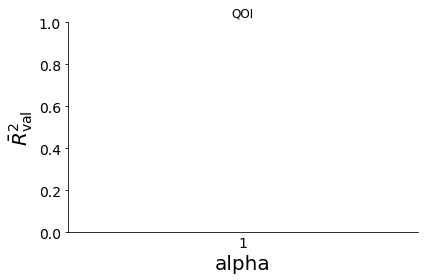

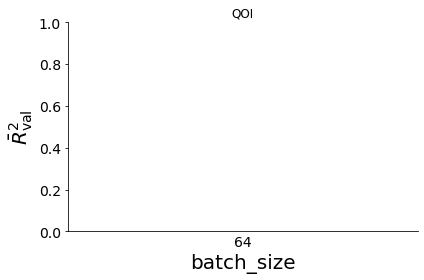

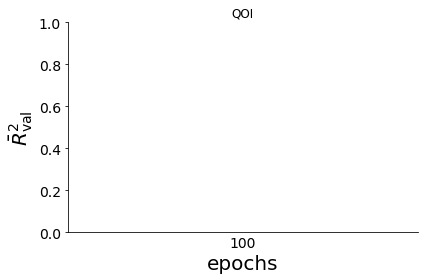

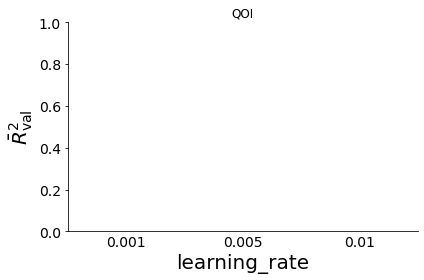

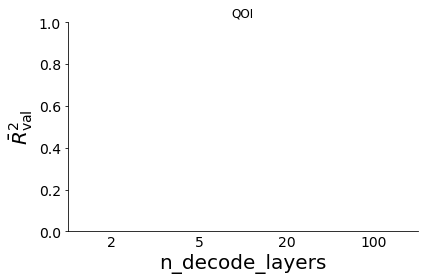

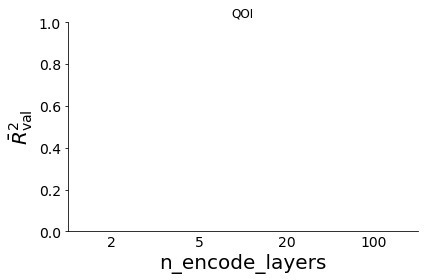

In [19]:
for param in to_plot.columns:
    if param == 'r2_adj_val_dvar1':
        continue
    if param == 'r2_adj_val_qoi1':
        continue

    fig, ax = plt.subplots()

    sns.boxplot(data=to_plot, x=param, y='r2_adj_val_qoi1', color=sns.color_palette()[0])

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim(y_lim)
    ax.set_xlabel(ax.get_xlabel(), fontsize=20)
    ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=20)
    ax.tick_params(labelsize=14)
    ax.tick_params(axis='x', length=0)
    #ax.grid(True, axis='y')
    ax.set_title('QOI')
    fig.tight_layout()
    fig.savefig(f'{plot_dir}/dependence_on_{param}.jpg')

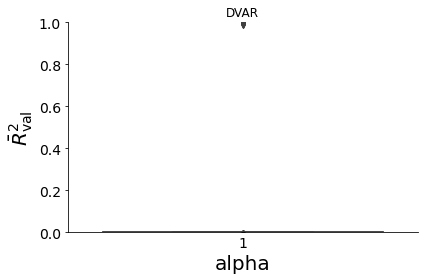

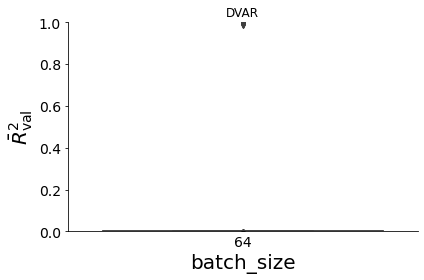

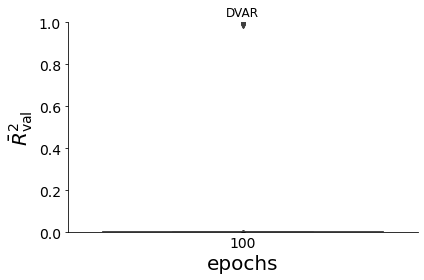

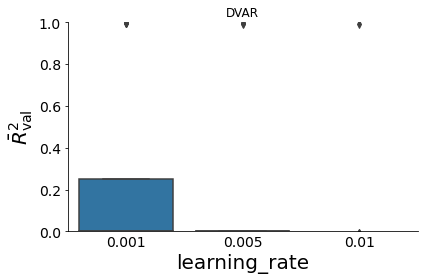

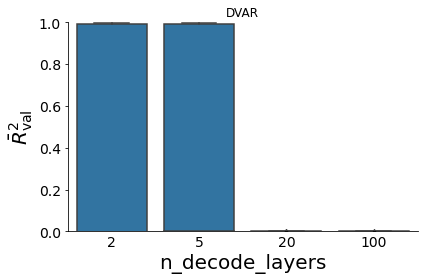

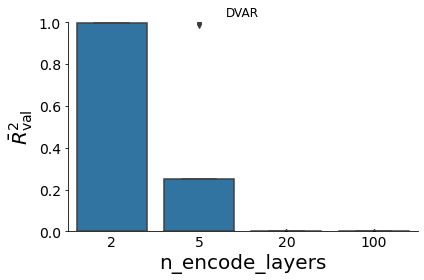

In [20]:
for param in to_plot.columns:
    if param == 'r2_adj_val_dvar1':
        continue
    if param == 'r2_adj_val_qoi1':
        continue

    fig, ax = plt.subplots()

    sns.boxplot(data=to_plot, x=param, y='r2_adj_val_dvar1', color=sns.color_palette()[0])

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim(y_lim)
    ax.set_xlabel(ax.get_xlabel(), fontsize=20)
    ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=20)
    ax.tick_params(labelsize=14)
    ax.tick_params(axis='x', length=0)
    #ax.grid(True, axis='y')
    ax.set_title("DVAR")
    fig.tight_layout()
    fig.savefig(f'{plot_dir}/dependence_on_{param}.jpg')

In [21]:
#g = sns.pairplot(data=df[config_columns + ['r2_adj_val']], hue='r2_adj_val', diag_kind='hist', corner=True)

In [22]:
len(config_columns)

6

In [23]:
len(config_column_labels)

6

In [24]:
#to_plot = df[config_columns + ['r2_adj_val_qoi1']].copy()
#to_plot['r2_adj_val_qoi1'], bins = pd.cut(df['r2_adj_val_qoi1'], 5, retbins=True)
#mean_points = [(bins[i] + bins[i-1]) / 2. for i in range(1, len(bins))]
#to_plot['r2_adj_val_qoi1'] = pd.cut(df['r2_adj_val_qoi1'], 5, retbins=False, labels=mean_points)

In [25]:
#to_plot['r2_adj_val_qoi1']


# Best configs

In [27]:
df

MAE_train_dvar1  MAE_train_dvar2  MAE_train_qoi1  MAE_val_dvar1  \
0          0.007514         0.122727        0.011683       0.007520   
1          0.012078         0.140439        0.007163       0.012026   
2          0.015704         0.130589        0.007016       0.015699   
3          0.007089         0.115246        0.010466       0.007075   
4          0.009393         0.138880        0.007982       0.009390   
5          0.220950         0.220950        0.007309       0.220773   
6          0.221493         0.221493        0.009497       0.221349   
7          0.219023         0.219023        0.007115       0.218761   
8          0.220950         0.220950        0.006452       0.220773   
9          0.221493         0.221493        0.009504       0.221349   
10         0.219509         0.219509        0.008176       0.219220   
11         0.220950         0.220950        0.006725       0.220773   
12         0.013976         0.126008        0.010387       0.013969   
13         0.219023         0.219023        0.106973       0.218761   
14         0.220950         0.220950        0.106531       0.220773   
15         0.013678         0.109996        0.008873       0.013661   
16         0.016331         0.129703        0.009815       0.016430   
17         0.220950         0.220950        0.106248       0.220773   
18         0.221771         0.221771        0.011770       0.221634   
19         0.221310         0.221310        0.009048       0.221159   
20         0.220950         0.220950        0.106251       0.220773   
21         0.221771         0.221771        0.009370       0.221634   
22         0.221310         0.221310        0.008321       0.221159   
23         0.220950         0.220950        0.106248       0.220773   
24         0.221493         0.221493        0.106152       0.221349   
25         0.219509         0.219509        0.107097       0.219220   
26         0.220950         0.220950        0.106336       0.220773   
27         0.221771         0.221771        0.106170       0.221634   
28         0.221310         0.221310        0.106381       0.221159   
29         0.220950         0.220950        0.107064       0.220773   
30         0.221493         0.221493        0.106170       0.221349   
31         0.219483         0.219483        0.106384       0.219228   
32         0.219023         0.219023        0.106530       0.218761   
33         0.221771         0.221771        0.106170       0.221634   
34         0.221310         0.221310        0.106381       0.221159   
35         0.220950         0.220950        0.106530       0.220773   
36         0.221493         0.221493        0.106198       0.221349   
37         0.218854         0.218854        0.106884       0.218560   
38         0.219509         0.219509        0.106248       0.219220   
39         0.221771         0.221771        0.106218       0.221634   
40         0.221310         0.221310        0.106381       0.221159   
41         0.220950         0.220950        0.107022       0.220773   
42         0.221533         0.221533        0.106218       0.221380   
43         0.221310         0.221310        0.106381       0.221159   
44         0.220950         0.220950        0.106530       0.220773   
45         0.221310         0.221310        0.106218       0.221159   
46         0.218854         0.218854        0.106381       0.218560   
47         0.220950         0.220950        0.106530       0.220773   

    MAE_val_dvar2  MAE_val_qoi1  MAPE_train_dvar1  MAPE_train_dvar2  \
0        0.147961      0.039825               inf               inf   
1        0.149053      0.040964               inf               inf   
2        0.229850      0.040960               inf               inf   
3        0.146038      0.040931               inf               inf   
4        0.153674      0.041525               inf               inf   
5        0.220773      0.040966               inf               inf   
6        0.221349      0.04

In [28]:
best_config = df.sort_values('r2_val_dvar2', ascending=False).iloc[0, :]

In [29]:
df.keys()

Index(['MAE_train_dvar1', 'MAE_train_dvar2', 'MAE_train_qoi1', 'MAE_val_dvar1',
       'MAE_val_dvar2', 'MAE_val_qoi1', 'MAPE_train_dvar1', 'MAPE_train_dvar2',
       'MAPE_train_qoi1', 'MAPE_val_dvar1', 'MAPE_val_dvar2', 'MAPE_val_qoi1',
       'MSE_train_dvar1', 'MSE_train_dvar2', 'MSE_train_qoi1', 'MSE_val_dvar1',
       'MSE_val_dvar2', 'MSE_val_qoi1',
       'median_percentile_max_error_train_dvar1',
       'median_percentile_max_error_train_dvar2',
       'median_percentile_max_error_train_qoi1',
       'median_percentile_max_error_val_dvar1',
       'median_percentile_max_error_val_dvar2',
       'median_percentile_max_error_val_qoi1',
       '90_percentile_max_error_train_dvar1',
       '90_percentile_max_error_train_dvar2',
       '90_percentile_max_error_train_qoi1',
       '90_percentile_max_error_val_dvar1',
       '90_percentile_max_error_val_dvar2', '90_percentile_max_error_val_qoi1',
       'r2_train_dvar1', 'r2_train_dvar2', 'r2_train_qoi1', 'r2_val_dvar1',
       'r2_v

In [30]:
df.sort_values('r2_val_qoi1', ascending=False)[config_columns + ['r2_train_dvar1', 'r2_train_dvar2', 'r2_train_qoi1', 'r2_val_dvar1',
       'r2_val_dvar2', 'r2_val_qoi1', 'r2_adj_train_dvar1',
       'r2_adj_train_dvar2', 'r2_adj_train_qoi1', 'r2_adj_val_dvar1',
       'r2_adj_val_dvar2', 'r2_adj_val_qoi1']].rename(columns=config_column_labels).head(5)

alpha  batch_size  epochs  learning_rate  n_decode_layers  \
0       1          64     100          0.001                2   
1       1          64     100          0.005                2   
26      1          64     100          0.010                2   
27      1          64     100          0.001                5   
28      1          64     100          0.005                5   

    n_encode_layers  r2_train_dvar1  r2_train_dvar2  r2_train_qoi1  \
0                 2        0.998244        0.613791           -inf   
1                 2        0.996825        0.504227           -inf   
26               20       -0.001097       -0.001097           -inf   
27               20       -0.000243       -0.000243           -inf   
28               20       -0.000707       -0.000707           -inf   

    r2_val_dvar1  r2_val_dvar2  r2_val_qoi1  r2_adj_train_dvar1  \
0       0.998261      0.434003         -inf            0.998244   
1       0.996850      0.396416         -inf            0.996825   
26     -0.000901     -0.000901         -inf           -0.001175   
27     -0.000259     -0.000259         -inf           -0.000321   
28     -0.000585     -0.000585         -inf           -0.000785   

    r2_adj_train_dvar2  r2_adj_train_qoi1  r2_adj_val_dvar1  r2_adj_val_dvar2  \
0             0.613760               -inf          0.998260          0.433826   
1             0.504188               -inf          0.996849          0.396228   
26           -0.001175               -inf         -0.001213         -0.001213   
27           -0.000321               -inf         -0.000572         -0.000572   
28           -0.000785               -inf         -0.000898         -0.000898   

    r2_adj_val_qoi1  
0              -inf  
1              -inf  
26             -inf  
27             -inf  
28             -inf

In [31]:
df.sort_values('r2_val_dvar1', ascending=False)[config_columns + ['r2_val_dvar1','r2_val_dvar2','r2_adj_val_qoi1','r2_adj_train_qoi1', 'MAPE_val_qoi1', 'median_percentile_max_error_val_qoi1', '90_percentile_max_error_val_qoi1','r2_val_qoi1']].rename(columns=config_column_labels).head(5)

alpha  batch_size  epochs  learning_rate  n_decode_layers  \
3       1          64     100          0.001                5   
0       1          64     100          0.001                2   
4       1          64     100          0.005                5   
1       1          64     100          0.005                2   
15      1          64     100          0.001                5   

    n_encode_layers  r2_val_dvar1  r2_val_dvar2  r2_adj_val_qoi1  \
3                 2      0.998721      0.422262             -inf   
0                 2      0.998261      0.434003             -inf   
4                 2      0.998021      0.359730             -inf   
1                 2      0.996850      0.396416             -inf   
15                5      0.995852      0.418711             -inf   

    r2_adj_train_qoi1  MAPE_val_qoi1  median_percentile_max_error_val_qoi1  \
3                -inf            inf                                   inf   
0                -inf            inf                                   inf   
4                -inf            inf                                   inf   
1                -inf            inf                                   inf   
15               -inf            inf                                   inf   

    90_percentile_max_error_val_qoi1  r2_val_qoi1  
3                                inf         -inf  
0                                inf         -inf  
4                                inf         -inf  
1                                inf         -inf  
15                               inf         -inf

In [32]:
df.sort_values('r2_val_dvar2', ascending=False)[config_columns + ['r2_val_dvar1','r2_val_dvar2','r2_adj_val_qoi1','r2_adj_train_qoi1', 'MAPE_val_qoi1', 'median_percentile_max_error_val_qoi1', '90_percentile_max_error_val_qoi1','r2_val_qoi1']].rename(columns=config_column_labels).head(5)

alpha  batch_size  epochs  learning_rate  n_decode_layers  \
0       1          64     100          0.001                2   
3       1          64     100          0.001                5   
15      1          64     100          0.001                5   
1       1          64     100          0.005                2   
16      1          64     100          0.005                5   

    n_encode_layers  r2_val_dvar1  r2_val_dvar2  r2_adj_val_qoi1  \
0                 2      0.998261      0.434003             -inf   
3                 2      0.998721      0.422262             -inf   
15                5      0.995852      0.418711             -inf   
1                 2      0.996850      0.396416             -inf   
16                5      0.993971      0.385728             -inf   

    r2_adj_train_qoi1  MAPE_val_qoi1  median_percentile_max_error_val_qoi1  \
0                -inf            inf                                   inf   
3                -inf            inf                                   inf   
15               -inf            inf                                   inf   
1                -inf            inf                                   inf   
16               -inf            inf                                   inf   

    90_percentile_max_error_val_qoi1  r2_val_qoi1  
0                                inf         -inf  
3                                inf         -inf  
15                               inf         -inf  
1                                inf         -inf  
16                               inf         -inf

In [33]:
best_config.name

0

In [34]:
best_config['trial_id']

'e1ae8_00000'

# Worst configs

In [35]:
df.sort_values('r2_adj_val_qoi1', ascending=True)[config_columns + ['r2_adj_val_qoi1', 'MAPE_val_qoi1', 'median_percentile_max_error_val_qoi1', '90_percentile_max_error_val_qoi1']].rename(columns=config_column_labels).head(5)

alpha  batch_size  epochs  learning_rate  n_decode_layers  \
0       1          64     100          0.001                2   
26      1          64     100          0.010                2   
27      1          64     100          0.001                5   
28      1          64     100          0.005                5   
29      1          64     100          0.010                5   

    n_encode_layers  r2_adj_val_qoi1  MAPE_val_qoi1  \
0                 2             -inf            inf   
26               20             -inf            inf   
27               20             -inf            inf   
28               20             -inf            inf   
29               20             -inf            inf   

    median_percentile_max_error_val_qoi1  90_percentile_max_error_val_qoi1  
0                                    inf                               inf  
26                                   inf                               inf  
27                                   inf                               inf  
28                                   inf                               inf  
29                                   inf                               inf

In [36]:
df

MAE_train_dvar1  MAE_train_dvar2  MAE_train_qoi1  MAE_val_dvar1  \
0          0.007514         0.122727        0.011683       0.007520   
1          0.012078         0.140439        0.007163       0.012026   
2          0.015704         0.130589        0.007016       0.015699   
3          0.007089         0.115246        0.010466       0.007075   
4          0.009393         0.138880        0.007982       0.009390   
5          0.220950         0.220950        0.007309       0.220773   
6          0.221493         0.221493        0.009497       0.221349   
7          0.219023         0.219023        0.007115       0.218761   
8          0.220950         0.220950        0.006452       0.220773   
9          0.221493         0.221493        0.009504       0.221349   
10         0.219509         0.219509        0.008176       0.219220   
11         0.220950         0.220950        0.006725       0.220773   
12         0.013976         0.126008        0.010387       0.013969   
13         0.219023         0.219023        0.106973       0.218761   
14         0.220950         0.220950        0.106531       0.220773   
15         0.013678         0.109996        0.008873       0.013661   
16         0.016331         0.129703        0.009815       0.016430   
17         0.220950         0.220950        0.106248       0.220773   
18         0.221771         0.221771        0.011770       0.221634   
19         0.221310         0.221310        0.009048       0.221159   
20         0.220950         0.220950        0.106251       0.220773   
21         0.221771         0.221771        0.009370       0.221634   
22         0.221310         0.221310        0.008321       0.221159   
23         0.220950         0.220950        0.106248       0.220773   
24         0.221493         0.221493        0.106152       0.221349   
25         0.219509         0.219509        0.107097       0.219220   
26         0.220950         0.220950        0.106336       0.220773   
27         0.221771         0.221771        0.106170       0.221634   
28         0.221310         0.221310        0.106381       0.221159   
29         0.220950         0.220950        0.107064       0.220773   
30         0.221493         0.221493        0.106170       0.221349   
31         0.219483         0.219483        0.106384       0.219228   
32         0.219023         0.219023        0.106530       0.218761   
33         0.221771         0.221771        0.106170       0.221634   
34         0.221310         0.221310        0.106381       0.221159   
35         0.220950         0.220950        0.106530       0.220773   
36         0.221493         0.221493        0.106198       0.221349   
37         0.218854         0.218854        0.106884       0.218560   
38         0.219509         0.219509        0.106248       0.219220   
39         0.221771         0.221771        0.106218       0.221634   
40         0.221310         0.221310        0.106381       0.221159   
41         0.220950         0.220950        0.107022       0.220773   
42         0.221533         0.221533        0.106218       0.221380   
43         0.221310         0.221310        0.106381       0.221159   
44         0.220950         0.220950        0.106530       0.220773   
45         0.221310         0.221310        0.106218       0.221159   
46         0.218854         0.218854        0.106381       0.218560   
47         0.220950         0.220950        0.106530       0.220773   

    MAE_val_dvar2  MAE_val_qoi1  MAPE_train_dvar1  MAPE_train_dvar2  \
0        0.147961      0.039825               inf               inf   
1        0.149053      0.040964               inf               inf   
2        0.229850      0.040960               inf               inf   
3        0.146038      0.040931               inf               inf   
4        0.153674      0.041525               inf               inf   
5        0.220773      0.040966               inf               inf   
6        0.221349      0.04

# Copy the best model to the models directory

In [37]:
best_model_dir = f'{best_config["logdir"]}'

In [38]:
best_model_dir

'/data/project/general/aerosolretriev/aerosol_results_21_08_2022/autoencoder_model/version1/train_autoencoder_2022-08-21_23-04-44/train_autoencoder_e1ae8_00000_0_alpha=1,batch_size=64,epochs=100,learning_rate=0.001,n_decode_layers=2,n_encode_layers=2_2022-08-21_23-04-44'

In [39]:
model_dir

'/data/project/general/aerosolretriev/aerosol_results_21_08_2022/autoencoder_model/version1/models'

In [40]:
model_dir_save = model_dir +'_dvar'
model_dir_save

'/data/project/general/aerosolretriev/aerosol_results_21_08_2022/autoencoder_model/version1/models_dvar'

In [ ]:
shutil.copytree(best_model_dir, f'{model_dir_save}')

# Closer look w. r. t. overfitting

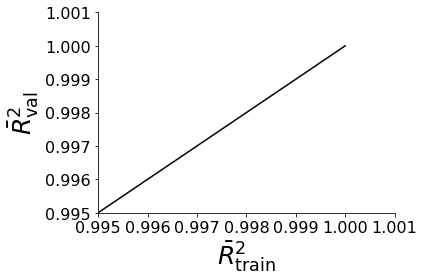

In [41]:
fig, ax = plt.subplots()

sns.scatterplot(data=df, x='r2_adj_train_qoi1', y='r2_adj_val_qoi1', ax=ax)
ax.plot([0., 1.], [0., 1.], color='black')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\bar{R}^2_\mathrm{train}$', fontsize=25)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=25)
ax.tick_params(labelsize=16)
ax.set_xlim([0.995, 1.001])
ax.set_ylim([0.995, 1.001])

fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_generalisation.jpg')

In [42]:
df[df['r2_adj_train_qoi1'] > 0.95]

Empty DataFrame
Columns: [MAE_train_dvar1, MAE_train_dvar2, MAE_train_qoi1, MAE_val_dvar1, MAE_val_dvar2, MAE_val_qoi1, MAPE_train_dvar1, MAPE_train_dvar2, MAPE_train_qoi1, MAPE_val_dvar1, MAPE_val_dvar2, MAPE_val_qoi1, MSE_train_dvar1, MSE_train_dvar2, MSE_train_qoi1, MSE_val_dvar1, MSE_val_dvar2, MSE_val_qoi1, median_percentile_max_error_train_dvar1, median_percentile_max_error_train_dvar2, median_percentile_max_error_train_qoi1, median_percentile_max_error_val_dvar1, median_percentile_max_error_val_dvar2, median_percentile_max_error_val_qoi1, 90_percentile_max_error_train_dvar1, 90_percentile_max_error_train_dvar2, 90_percentile_max_error_train_qoi1, 90_percentile_max_error_val_dvar1, 90_percentile_max_error_val_dvar2, 90_percentile_max_error_val_qoi1, r2_train_dvar1, r2_train_dvar2, r2_train_qoi1, r2_val_dvar1, r2_val_dvar2, r2_val_qoi1, r2_adj_train_dvar1, r2_adj_train_dvar2, r2_adj_train_qoi1, r2_adj_val_dvar1, r2_adj_val_dvar2, r2_adj_val_qoi1, time_this_iter_s, done, timesteps_total, episodes_total, training_iteration, experiment_id, date, timestamp, time_total_s, pid, hostname, node_ip, time_since_restore, timesteps_since_restore, iterations_since_restore, trial_id, config/alpha, config/batch_size, config/datafile, config/epochs, config/learning_rate, config/n_decode_layers, config/n_encode_layers, logdir]
Index: []

[0 rows x 66 columns]

In [43]:
# LOad history of best config

In [44]:
best_model_folder = best_config['trial_id']

In [45]:
result_dir

'/data/project/general/aerosolretriev/aerosol_results_21_08_2022/autoencoder_model/version1'

In [46]:
best_model_hist = pd.read_csv(f'{result_dir}/histories/{best_model_folder}.csv', index_col=0)

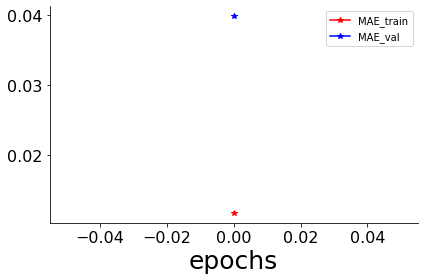

In [47]:
fig, ax = plt.subplots()

ax.plot(best_model_hist['MAE_train_qoi1'],'r*-', label = 'MAE_train')
ax.plot(best_model_hist['MAE_val_qoi1'],'b*-',label =  'MAE_val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()
fig.tight_layout()


In [48]:
best_model_hist

MAE_train_dvar1  MAE_train_dvar2  MAE_train_qoi1  MAE_val_dvar1  \
0         0.007514         0.122727        0.011683        0.00752   

   MAE_val_dvar2  MAE_val_qoi1  MAPE_train_dvar1  MAPE_train_dvar2  \
0       0.147961      0.039825               inf               inf   

   MAPE_train_qoi1  MAPE_val_dvar1  ...                 date   timestamp  \
0              inf             inf  ...  2022-08-22_00-13-48  1661120028   

   time_total_s    pid             hostname         node_ip  \
0   4132.944986  42422  merlin-c-117.psi.ch  129.129.185.67   

   time_since_restore  timesteps_since_restore  iterations_since_restore  \
0         4132.944986                        0                         1   

      trial_id  
0  e1ae8_00000  

[1 rows x 58 columns]

In [49]:
best_model_hist.keys()

Index(['MAE_train_dvar1', 'MAE_train_dvar2', 'MAE_train_qoi1', 'MAE_val_dvar1',
       'MAE_val_dvar2', 'MAE_val_qoi1', 'MAPE_train_dvar1', 'MAPE_train_dvar2',
       'MAPE_train_qoi1', 'MAPE_val_dvar1', 'MAPE_val_dvar2', 'MAPE_val_qoi1',
       'MSE_train_dvar1', 'MSE_train_dvar2', 'MSE_train_qoi1', 'MSE_val_dvar1',
       'MSE_val_dvar2', 'MSE_val_qoi1',
       'median_percentile_max_error_train_dvar1',
       'median_percentile_max_error_train_dvar2',
       'median_percentile_max_error_train_qoi1',
       'median_percentile_max_error_val_dvar1',
       'median_percentile_max_error_val_dvar2',
       'median_percentile_max_error_val_qoi1',
       '90_percentile_max_error_train_dvar1',
       '90_percentile_max_error_train_dvar2',
       '90_percentile_max_error_train_qoi1',
       '90_percentile_max_error_val_dvar1',
       '90_percentile_max_error_val_dvar2', '90_percentile_max_error_val_qoi1',
       'r2_train_dvar1', 'r2_train_dvar2', 'r2_train_qoi1', 'r2_val_dvar1',
       'r2_v

In [50]:
best_model_hist['r2_train_dvar1']

0    0.998244
Name: r2_train_dvar1, dtype: float64

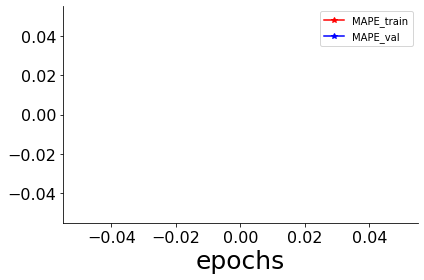

In [51]:
fig, ax = plt.subplots()

ax.plot(best_model_hist['MAPE_train_qoi1'],'r*-', label = 'MAPE_train')
ax.plot(best_model_hist['MAPE_val_qoi1'],'b*-',label =  'MAPE_val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()
fig.tight_layout()

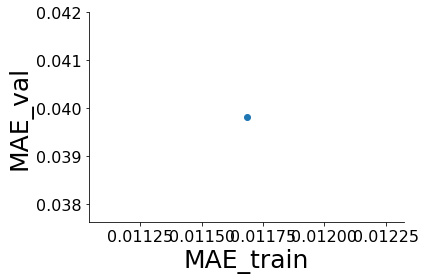

In [52]:
fig, ax = plt.subplots()


ax.scatter(best_model_hist['MAE_train_qoi1'],best_model_hist['MAE_val_qoi1'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('MAE_train', fontsize=25)
ax.set_ylabel('MAE_val', fontsize=25)

ax.tick_params(labelsize=16)
fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_generalisation.jpg')

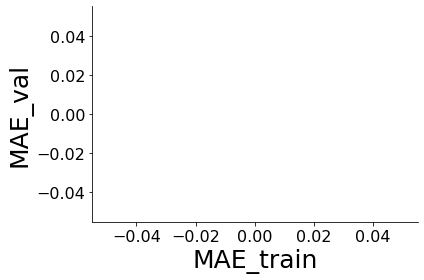

In [53]:
fig, ax = plt.subplots()


ax.scatter(best_model_hist['r2_train_qoi1'],best_model_hist['r2_val_qoi1'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('MAE_train', fontsize=25)
ax.set_ylabel('MAE_val', fontsize=25)

ax.tick_params(labelsize=16)
fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_generalisation.jpg')

In [54]:
to_plot

alpha  batch_size  epochs  learning_rate  n_decode_layers  \
0       1          64     100          0.001                2   
1       1          64     100          0.005                2   
2       1          64     100          0.010                2   
3       1          64     100          0.001                5   
4       1          64     100          0.005                5   
5       1          64     100          0.010                5   
6       1          64     100          0.001               20   
7       1          64     100          0.005               20   
8       1          64     100          0.010               20   
9       1          64     100          0.001              100   
10      1          64     100          0.005              100   
11      1          64     100          0.010              100   
12      1          64     100          0.001                2   
13      1          64     100          0.005                2   
14      1          64     100          0.010                2   
15      1          64     100          0.001                5   
16      1          64     100          0.005                5   
17      1          64     100          0.010                5   
18      1          64     100          0.001               20   
19      1          64     100          0.005               20   
20      1          64     100          0.010               20   
21      1          64     100          0.001              100   
22      1          64     100          0.005              100   
23      1          64     100          0.010              100   
24      1          64     100          0.001                2   
25      1          64     100          0.005                2   
26      1          64     100          0.010                2   
27      1          64     100          0.001                5   
28      1          64     100          0.005                5   
29      1          64     100          0.010                5   
30      1          64     100          0.001               20   
31      1          64     100          0.005               20   
32      1          64     100          0.010               20   
33      1          64     100          0.001              100   
34      1          64     100          0.005              100   
35      1          64     100          0.010              100   
36      1          64     100          0.001                2   
37      1          64     100          0.005                2   
38      1          64     100          0.010                2   
39      1          64     100          0.001                5   
40      1          64     100          0.005                5   
41      1          64     100          0.010                5   
42      1          64     100          0.001               20   
43      1          64     100          0.005               20   
44      1          64     100          0.010               20   
45      1          64     100          0.001              100   
46      1          64     100          0.005              100   
47      1          64     100          0.010              100   

    n_encode_layers  r2_adj_val_dvar1  r2_adj_val_qoi1  
0                 2          0.998260             -inf  
1                 2          0.996849             -inf  
2                 2          0.993225             -inf  
3                 2          0.998720             -inf  
4                 2          0.998021             -inf  
5                 2         -0.001213             -inf  
6                 2         -0.000788             -inf  
7                 2         -0.007873             -inf  
8                 2         -0.001213             -inf  
9                 2         -0.000788             -inf  
10                2         -0.009405             -inf  
11                2         -0.001213             -inf  
12                5          0.995384             -inf  
13                5 

In [55]:
to_plot_ow.columns

Index(['alpha', 'batch_size', 'epochs', 'learning_rate', 'n_decode_layers',
       'n_encode_layers', 'r2_adj_val_dvar1', 'r2_adj_val_qoi1'],
      dtype='object')

In [56]:
best_config

MAE_train_dvar1                                                    0.007514
MAE_train_dvar2                                                    0.122727
MAE_train_qoi1                                                     0.011683
MAE_val_dvar1                                                       0.00752
MAE_val_dvar2                                                      0.147961
                                                ...                        
config/epochs                                                           100
config/learning_rate                                                  0.001
config/n_decode_layers                                                    2
config/n_encode_layers                                                    2
logdir                    /data/project/general/aerosolretriev/aerosol_r...
Name: 0, Length: 66, dtype: object

# create overview plot

In [57]:
best_config

MAE_train_dvar1                                                    0.007514
MAE_train_dvar2                                                    0.122727
MAE_train_qoi1                                                     0.011683
MAE_val_dvar1                                                       0.00752
MAE_val_dvar2                                                      0.147961
                                                ...                        
config/epochs                                                           100
config/learning_rate                                                  0.001
config/n_decode_layers                                                    2
config/n_encode_layers                                                    2
logdir                    /data/project/general/aerosolretriev/aerosol_r...
Name: 0, Length: 66, dtype: object

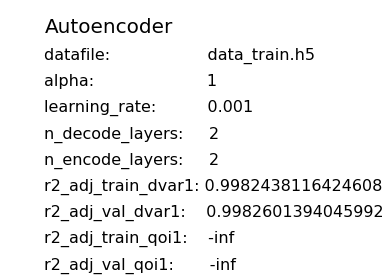

In [58]:
fig, ax = plt.subplots()

ax.annotate(xy=(1, 1),xytext=(0.1, 0.9),text='Autoencoder',fontsize=20)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.8),text='datafile:                   '+os.path.basename(best_config['config/datafile']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.7),text='alpha:                      '+str(best_config['config/alpha']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.6),text='learning_rate:          '+str(best_config['config/learning_rate']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.5),text='n_decode_layers:     '+str(best_config['config/n_decode_layers']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.4),text='n_encode_layers:     '+str(best_config['config/n_encode_layers']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.3),text='r2_adj_train_dvar1: '+str(best_config['r2_adj_train_dvar1']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.2),text='r2_adj_val_dvar1:    '+str(best_config['r2_adj_val_dvar1']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.1),text='r2_adj_train_qoi1:    '+str(np.round(best_config['r2_adj_train_qoi1'],3)),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.0),text='r2_adj_val_qoi1:       '+str(np.round(best_config['r2_adj_val_qoi1'],3)),fontsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
fig.tight_layout()
fig.savefig(f'{plot_dir}/forward_model_description.jpg',bbox_inches='tight')

1 0
1 1
1 2
2 0


/psi/home/boiger_r/.local/lib/python3.7/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/psi/home/boiger_r/.local/lib/python3.7/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/psi/home/boiger_r/.local/lib/python3.7/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/psi/home/boiger_r/.local/lib/python3.7/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/psi/home/boiger_r/.local/lib/python3.7/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/psi/home/boiger_r/.local/lib/python3.7/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = s

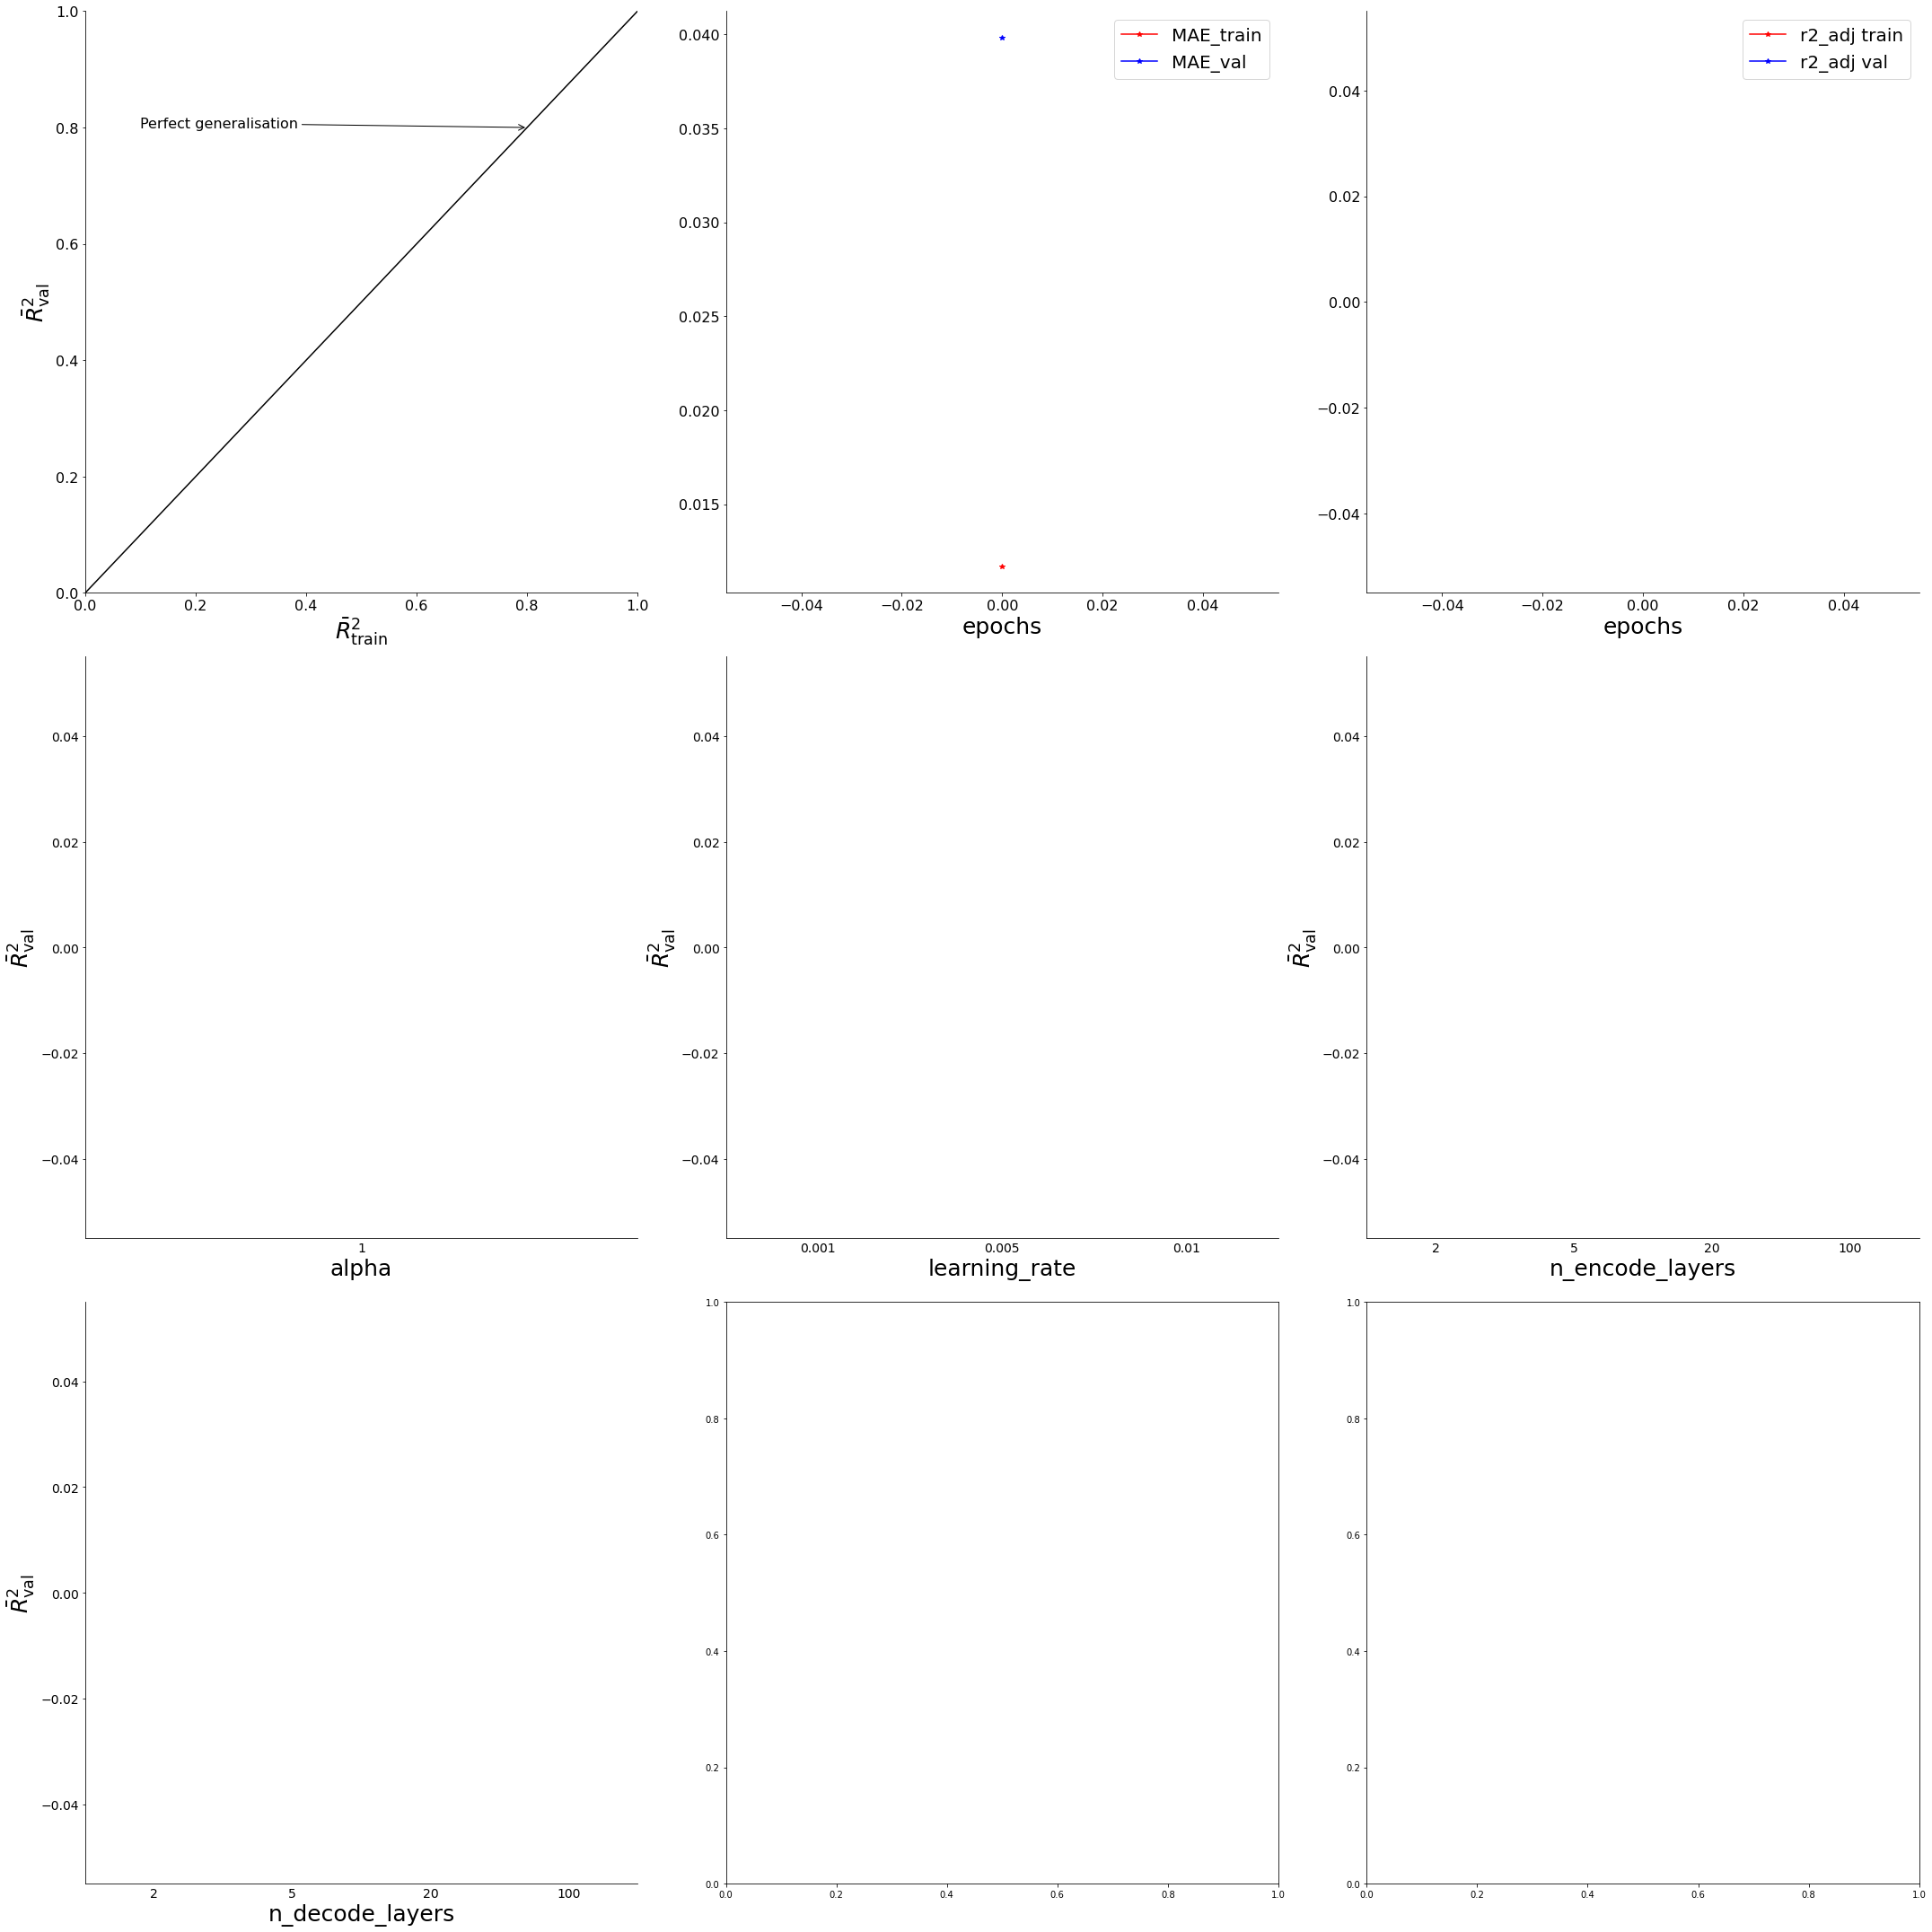

In [59]:
fig, axes = plt.subplots(3, 3, figsize=(30, 30))

ax= axes[0,0]
sns.scatterplot(data=df, x='r2_adj_train_qoi1', y='r2_adj_val_qoi1', ax=ax)
ax.plot([-1.5, 1.], [-1.5, 1.], color='black')
ax.annotate(xy=(0.8, 0.8),
            xytext=(0.1, 0.8),
            text='Perfect generalisation',
            fontsize=16,
            arrowprops={
                'arrowstyle': '->'
            })
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\bar{R}^2_\mathrm{train}$', fontsize=25)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=25)
ax.tick_params(labelsize=16)
ax.set_xlim([0, 1.])
ax.set_ylim([0, 1.])


ax = axes[0,1]
ax.plot(best_model_hist['MAE_train_qoi1'],'r*-', label = 'MAE_train')
ax.plot(best_model_hist['MAE_val_qoi1'],'b*-',label =  'MAE_val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend(fontsize = 20)

ax = axes[0,2]

ax.plot(best_model_hist['r2_adj_train_qoi1'],'r*-', label = 'r2_adj train')
ax.plot(best_model_hist['r2_adj_val_qoi1'],'b*-',label =  'r2_adj val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend(fontsize = 20)


axeslist= [[1,0],[1,1],[1,2],[2,0],[2,1]]
i = 0

plot_columns_list = ['alpha', 'learning_rate', 'n_encode_layers', 'n_decode_layers']

for param in plot_columns_list:
    if param == 'r2_adj_val_qoi1':
        continue
    ax = axes[axeslist[i][0],axeslist[i][1]]
    print(axeslist[i][0],axeslist[i][1])
    i = i+1
    sns.boxplot(x=param, y='r2_adj_val_qoi1',data=to_plot_ow, color=sns.color_palette()[0],ax=ax)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
 #   ax.set_ylim([0,1])
    ax.set_xlabel(ax.get_xlabel(), fontsize=25)
#    ax.set_xlabel(fontsize =25)
    ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=25)
    ax.tick_params(labelsize=14)
    ax.tick_params(axis='x', length=0)



#ax = axes[2,2]

#sns.boxplot(data=df, x='config/batch_size', y='time_since_restore', color=sns.color_palette()[0],ax=ax)

#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)

fig.tight_layout()


fig.savefig(f'{plot_dir}/hyperparameter_scan_overview.jpg',bbox_inches='tight')